In [25]:
# Basic classification: Classify images of clothing
# https://www.tensorflow.org/tutorials/keras/classification

In [26]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [27]:
# Import the Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [29]:
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [30]:
# Explore the data
train_images.shape

(60000, 28, 28)

In [31]:
len(train_labels)

60000

In [32]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [33]:
test_images.shape

(10000, 28, 28)

In [34]:
len(test_labels)

10000

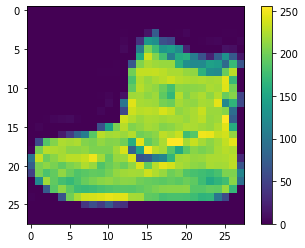

In [35]:
# Preprocess the data
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [36]:
train_images = train_images / 255.0

test_images = test_images / 255.0

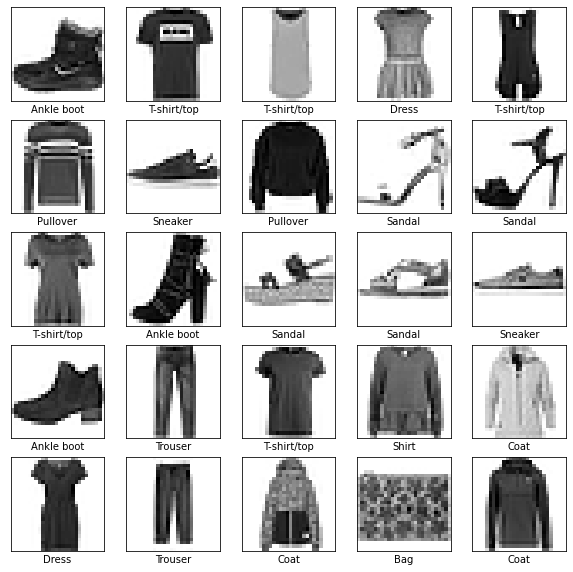

In [37]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [39]:
# Build the model

In [40]:
# Set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [41]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
# Train the model

In [43]:
# Feed the model
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4963 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3726 - accuracy: 0.8671
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3386 - accuracy: 0.8768
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3116 - accuracy: 0.8865
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2940 - accuracy: 0.8924
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2785 - accuracy: 0.8967
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2661 - accuracy: 0.9013
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2567 - accuracy: 0.9047
Epoch 9/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2466 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2

In [45]:
# Evaluate Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3427 - accuracy: 0.8802

Test accuracy: 0.8802000284194946


In [47]:
# Make predictions
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)

predictions[0]

array([5.8199871e-06, 4.9118878e-08, 8.1862332e-08, 1.3712231e-08,
       1.3767587e-07, 4.5595750e-02, 2.8241359e-07, 8.1282752e-03,
       4.0710012e-07, 9.4626915e-01], dtype=float32)

In [48]:
np.argmax(predictions[0])

9

In [49]:
test_labels[0]

9

In [51]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

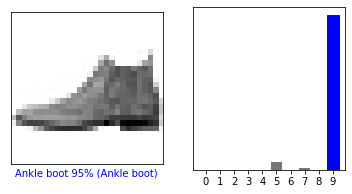

In [54]:
# Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

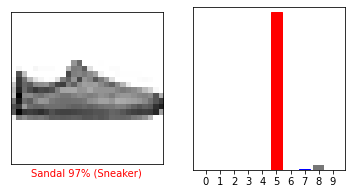

In [55]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

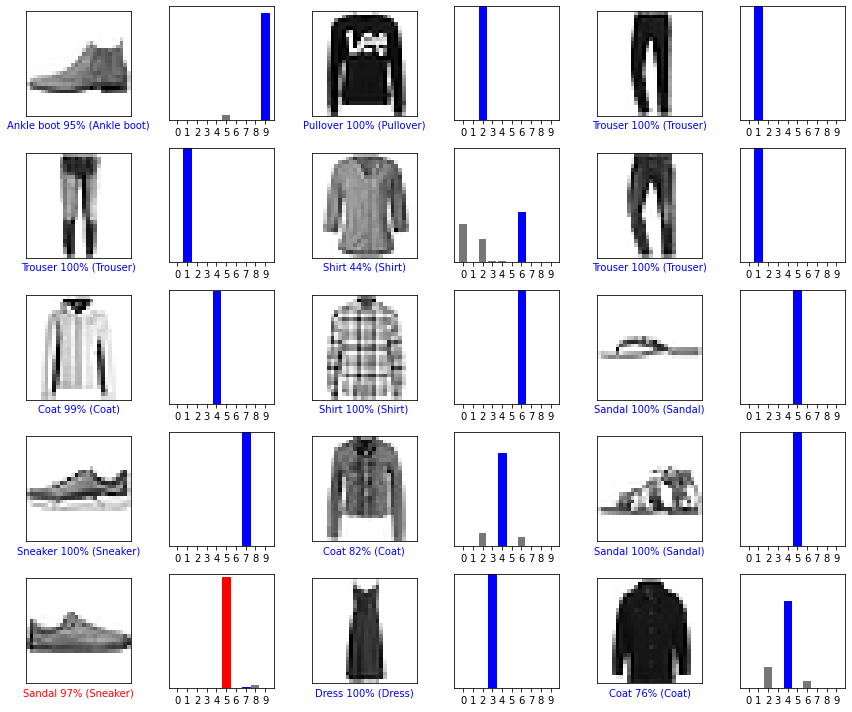

In [56]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()